# Simulation as Risk Testing: Seeing What Could Happen

This notebook demonstrates a fundamental shift in thinking: from **deterministic models** (single-point estimates) to **simulation** (testing under uncertainty).

Understanding this distinction is critical because:
- **Deterministic models** give you one answer based on fixed assumptions
- **Simulation** shows you a range of possible outcomes under uncertainty
- Simulation reveals whether recommendations are robust or fragile
- Without simulation, you cannot see the risks you're taking


## Key Concepts

**Deterministic Models** assume you know exactly what will happen:
- Use single-point estimates (demand = 1,000 units exactly)
- Give you one answer
- Hide the range of possible outcomes
- Create false confidence

**Simulation** tests recommendations under uncertainty:
- Runs many scenarios with different input values
- Shows range of possible outcomes (best case, worst case, most likely)
- Reveals whether recommendations are robust or fragile
- Answers "What if?" questions

**Critical insight**: A recommendation that looks optimal with fixed inputs might fail catastrophically when inputs vary. Simulation shows you this risk before implementation.


## Scenario: Inventory Stocking Decision

You manage a retail store and need to decide how much inventory to stock for a product. 

**Deterministic approach**: 
- Assume demand will be exactly 1,000 units
- Stock 1,000 units
- One answer, no uncertainty

**Simulation approach**:
- Demand could be 800, 900, 1,000, 1,100, or 1,200 units
- Test stocking 1,000 units under all these scenarios
- See the range of outcomes: profits, stockouts, excess inventory
- Understand the risk before deciding


## Step 1: Install Required Packages (Colab)

If you're running this notebook in Google Colab, you need to install required packages first. This cell can be skipped if running locally and packages are already installed.


In [1]:
# Install required packages (if needed in Colab)
# Can be skipped if already installed locally
%pip install numpy matplotlib pandas -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)


## Step 3: Deterministic Model - Single Point Estimate

First, let's see what a deterministic model tells us:


In [3]:
# DETERMINISTIC MODEL: Single-point estimate
# We assume we know demand exactly

demand_estimate = 1000  # We assume demand will be exactly 1,000 units
stocking_decision = 1000  # We stock 1,000 units

# Business parameters
selling_price = 50  # Price per unit
cost_per_unit = 30  # Cost per unit
profit_per_unit = selling_price - cost_per_unit

# Calculate profit (deterministic)
units_sold = min(demand_estimate, stocking_decision)  # Can't sell more than we stock
excess_inventory = max(0, stocking_decision - demand_estimate)
profit = units_sold * profit_per_unit - excess_inventory * cost_per_unit  # Excess inventory is a loss

print("DETERMINISTIC MODEL RESULT:")
print(f"  Assumed demand: {demand_estimate} units")
print(f"  Stocking decision: {stocking_decision} units")
print(f"  Expected profit: ${profit:,.2f}")
print(f"\n⚠️  This model assumes demand is CERTAIN. But is it?")


DETERMINISTIC MODEL RESULT:
  Assumed demand: 1000 units
  Stocking decision: 1000 units
  Expected profit: $20,000.00

⚠️  This model assumes demand is CERTAIN. But is it?


## Step 4: Simulation - Testing Under Uncertainty

Now let's use simulation to test the same decision under many possible demand scenarios:


In [4]:
# SIMULATION: Test under many scenarios
# Demand is uncertain - it could be anywhere from 800 to 1,200 units

def calculate_profit(demand, stock):
    """Calculate profit for a given demand and stocking level"""
    units_sold = min(demand, stock)
    excess_inventory = max(0, stock - demand)
    profit = units_sold * profit_per_unit - excess_inventory * cost_per_unit
    return profit

# Run simulation: test stocking 1,000 units under many demand scenarios
num_scenarios = 1000
demand_scenarios = np.random.normal(loc=1000, scale=100, size=num_scenarios)  # Mean 1000, std 100
demand_scenarios = np.clip(demand_scenarios, 800, 1200)  # Keep within reasonable range

# Calculate profit for each scenario
profits = [calculate_profit(demand, stocking_decision) for demand in demand_scenarios]
profits = np.array(profits)

print("SIMULATION RESULTS (testing 1,000 units under uncertainty):")
print(f"  Number of scenarios tested: {num_scenarios:,}")
print(f"  Best case profit: ${profits.max():,.2f}")
print(f"  Worst case profit: ${profits.min():,.2f}")
print(f"  Average profit: ${profits.mean():,.2f}")
print(f"  Median profit: ${np.median(profits):,.2f}")
print(f"\n📊 Range of outcomes: ${profits.min():,.2f} to ${profits.max():,.2f}")
print(f"   This is what you NEED to know, not just the average!")


SIMULATION RESULTS (testing 1,000 units under uncertainty):
  Number of scenarios tested: 1,000
  Best case profit: $20,000.00
  Worst case profit: $10,000.00
  Average profit: $18,126.13
  Median profit: $20,000.00

📊 Range of outcomes: $10,000.00 to $20,000.00
   This is what you NEED to know, not just the average!


## Step 5: Visualize the Difference

Let's see the difference between single-point thinking and range thinking:


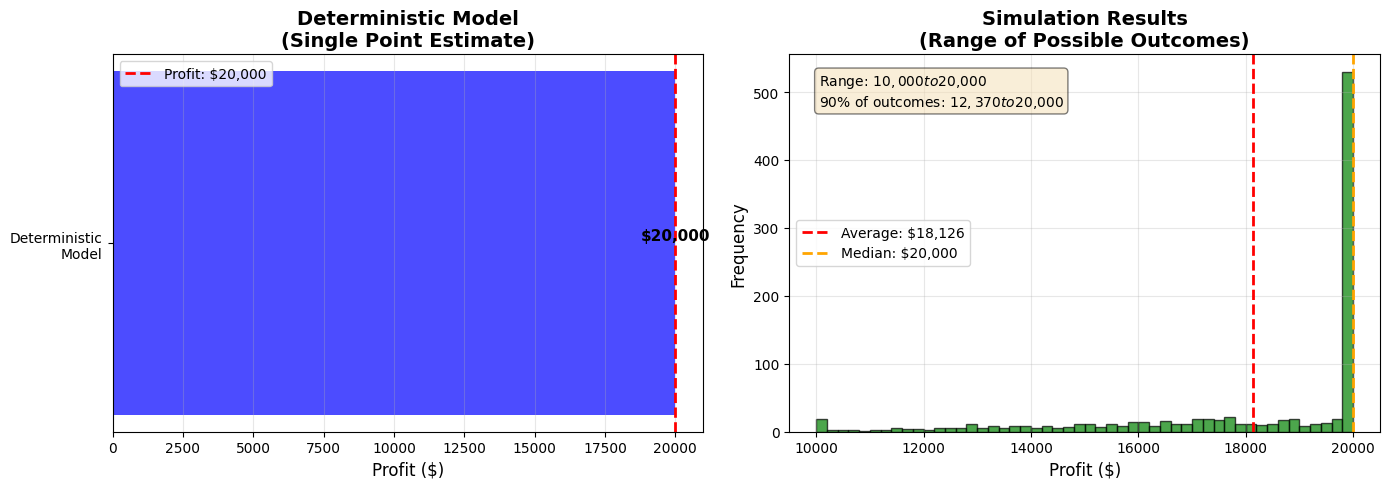


🔍 KEY INSIGHT:
   Deterministic model shows ONE number. Simulation shows the RANGE.
   The range tells you about RISK - something the single number hides!


In [5]:
# Create visualization comparing deterministic vs simulation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Deterministic (single point)
ax1.barh(['Deterministic\nModel'], [profit], color='blue', alpha=0.7)
ax1.axvline(profit, color='red', linestyle='--', linewidth=2, label=f'Profit: ${profit:,.0f}')
ax1.set_xlabel('Profit ($)', fontsize=12)
ax1.set_title('Deterministic Model\n(Single Point Estimate)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)
ax1.text(profit, 0, f'${profit:,.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Right plot: Simulation (range)
ax2.hist(profits, bins=50, color='green', alpha=0.7, edgecolor='black')
ax2.axvline(profits.mean(), color='red', linestyle='--', linewidth=2, label=f'Average: ${profits.mean():,.0f}')
ax2.axvline(np.median(profits), color='orange', linestyle='--', linewidth=2, label=f'Median: ${np.median(profits):,.0f}')
ax2.set_xlabel('Profit ($)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Simulation Results\n(Range of Possible Outcomes)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Add text box with key statistics
textstr = f'Range: ${profits.min():,.0f} to ${profits.max():,.0f}\n'
textstr += f'90% of outcomes: ${np.percentile(profits, 5):,.0f} to ${np.percentile(profits, 95):,.0f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print("\n🔍 KEY INSIGHT:")
print("   Deterministic model shows ONE number. Simulation shows the RANGE.")
print("   The range tells you about RISK - something the single number hides!")


## Step 6: Understanding Robustness

Simulation helps us see if a recommendation is robust (works well across scenarios) or fragile (only works in specific conditions):


In [6]:
# Calculate risk metrics
profit_std = profits.std()
profit_cv = profit_std / profits.mean()  # Coefficient of variation (relative risk)

# Probability of negative profit (loss)
prob_loss = (profits < 0).sum() / len(profits) * 100

# Probability of profit below $10,000 (low performance)
prob_low = (profits < 10000).sum() / len(profits) * 100

print("RISK ANALYSIS:")
print(f"  Standard deviation: ${profit_std:,.2f}")
print(f"  Coefficient of variation: {profit_cv:.2%} (lower = less risky)")
print(f"  Probability of loss: {prob_loss:.1f}%")
print(f"  Probability of profit < $10,000: {prob_low:.1f}%")
print(f"\n💡 INTERPRETATION:")
if profit_cv < 0.1:
    print("   This recommendation is relatively ROBUST (low variability)")
elif profit_cv < 0.2:
    print("   This recommendation has MODERATE risk (some variability)")
else:
    print("   This recommendation is FRAGILE (high variability, risky)")

if prob_loss > 5:
    print(f"   ⚠️  Warning: {prob_loss:.1f}% chance of losing money!")


RISK ANALYSIS:
  Standard deviation: $2,670.37
  Coefficient of variation: 14.73% (lower = less risky)
  Probability of loss: 0.0%
  Probability of profit < $10,000: 0.0%

💡 INTERPRETATION:
   This recommendation has MODERATE risk (some variability)


## Key Takeaways

1. **Deterministic models hide risk**: They give you one number and make it seem certain, but the future is uncertain.

2. **Simulation reveals risk**: By testing under many scenarios, you see the range of possible outcomes - best case, worst case, and everything in between.

3. **Range thinking is essential**: A recommendation with a wide range of outcomes is riskier than one with a narrow range, even if the average is the same.

4. **Robustness matters**: A recommendation that works well across many scenarios is better than one that only works under perfect conditions.

5. **Simulation answers "What if?"**: It shows you what could happen, not just what should happen under perfect assumptions.

**Next steps**: In the next notebook, we'll see what actually breaks when you ignore uncertainty and use deterministic models.
